In [1]:
from basicTimeSeries import ARIMAModels

In [2]:
import pandas as pd
data = pd.read_csv("export_prices_1 - Copy11.csv")
data["date"] = pd.to_datetime(data["date"])
data.set_index("date", inplace=True)
data.head()

,Year,Month,Volume Horticulture (Tonnes),Average Horticulture (Kshs. per Tonne),Annual Average Inflation,Diaspora Remittances,Euro ex,Sterling Pound ex,US ex,CB Deposit,CB Savings,CB Overdraft,CB Lending,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions)
date,,,,,,,,,,,,,,,,,
2007-01-01,2007,Jan,17112.39,188541.52,6.08,40930.36,90.87,136.91,69.89,4.35,1.42,14.11,13.78,307,0.020992,0.021714,0.064391
2007-02-01,2007,Feb,18905.81,175393.06,5.55,39533.07,91.04,136.40,69.62,4.21,1.41,14.05,13.64,307,0.020992,0.021714,0.064391
2007-03-01,2007,Mar,24796.49,148545.24,4.99,48561.00,91.77,134.91,69.29,4.19,1.43,13.95,13.56,307,0.020992,0.021714,0.064391
2007-04-01,2007,Apr,22748.93,168518.27,4.69,38250.91,92.68,136.40,68.58,4.11,1.35,13.26,13.33,362,0.054944,0.070000,0.220896
2007-05-01,2007,May,22885.72,168111.86,4.47,41163.50,90.82,133.31,67.19,4.14,1.57,13.35,13.38,447,0.107733,0.150000,0.483709


In [3]:
data = data[['Volume Horticulture  (Tonnes)',
       'Average Horticulture (Kshs. per Tonne)', 'Annual Average Inflation ',
       'Diaspora Remittances', 'Euro ex', 'Sterling Pound ex', 'US ex',
       'CB Deposit', 'CB Savings', 'CB Overdraft ', 'CB Lending ',
       'Active Agents', 'Total Registered Mobile Money Accounts (Millions)',
       'Total Agent Cash in Cash Out (Volume Million)',
       'Total Agent Cash in Cash Out (Value KSh billions)']]

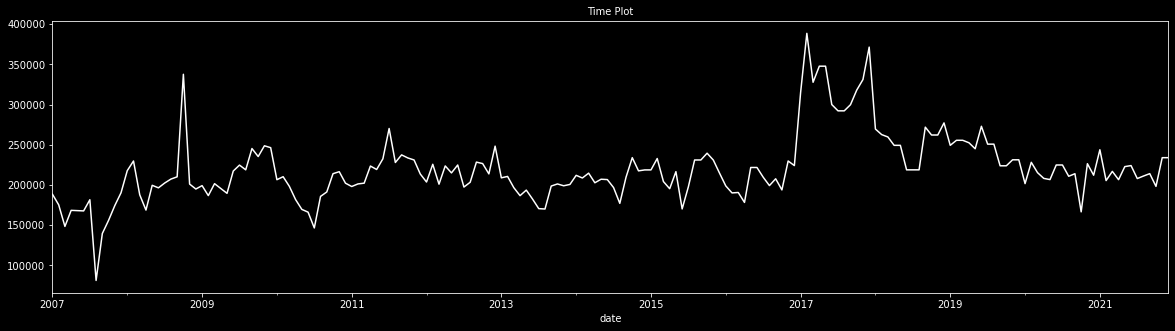

In [4]:
timeseries = ARIMAModels()
timeseries.trend_visualizations(data["Average Horticulture (Kshs. per Tonne)"])

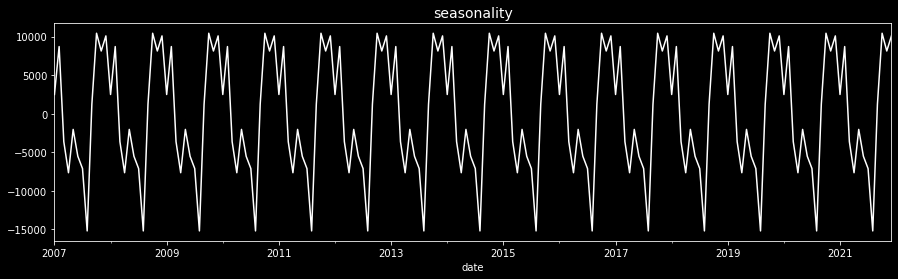

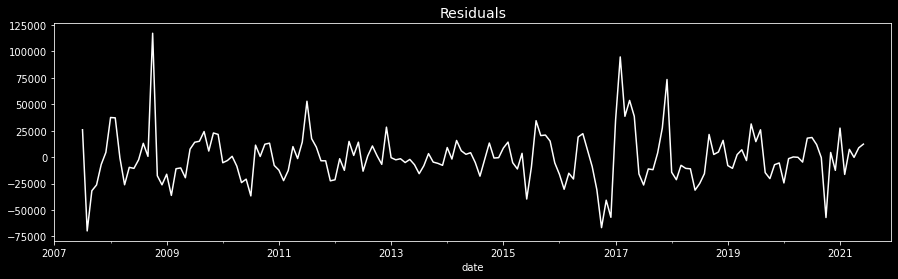

In [5]:
timeseries.decomposition_plot(data["Average Horticulture (Kshs. per Tonne)"], period=12)

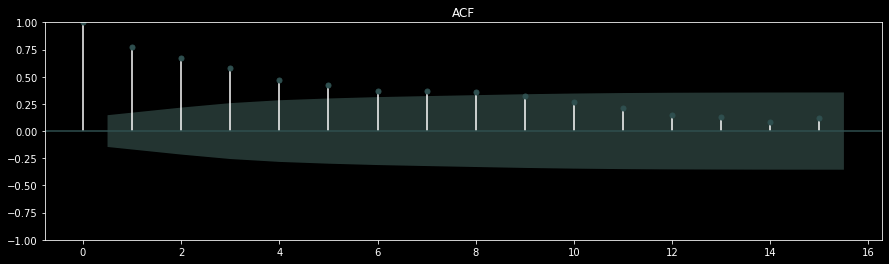

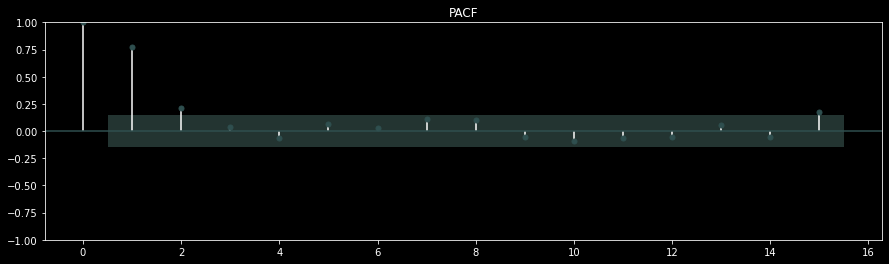

In [6]:
timeseries.correlation_function(data["Average Horticulture (Kshs. per Tonne)"], lags=15)

In [7]:
timeseries.stationarity_check(data)

    Augmented Dickey-Fuller Test on "Volume Horticulture  (Tonnes)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8409
 No. Lags Chosen       = 4
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.3603. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Average Horticulture (Kshs. per Tonne)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.7007
 No. Lags Chosen       = 1
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0041. Rejecting Null Hypothesis.
 => Series is Stationary.
    Augmented Dickey-Fuller Test on "Annual Average Inflation " 
    --------------------------

In [8]:
timeseries.stationarity_check(data["Average Horticulture (Kshs. per Tonne)"])

Augmented Dickey Fuller Test 

null-hypothesis: The data is non-stationary
alternative-hypothesis: The data is stationary 
 -----------------------------------------------
p-value:                = 0.00410363720019414
test-statistic:         = -3.700677313400818
Number of lag chosen:   = 1
observation:            = 178
critical-values:        = {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}
maximized-criteria:     = 3814.4229822616194
=> The data is stationary. The p-value is 0.004 thus we reject the null hypothesis


----------------------------------------------- 
 ----------------------------------------------- 

KPSS Test for Stationarity 

H0: The time series data is stationary
H1:The time series data is non-stationary 
 -----------------------------------------------
KPSS Statistic: =0.6673600550952664
p-value:        =0.016512722264066686
num lags:       =8
Critial Values:
   10% :  =0.347
   5% :  =0.463
   2.5% :  =0.574
   1% :  =0.739
Result

In [9]:
train, test = timeseries.split_data(data["Volume Horticulture  (Tonnes)"])

In [10]:

p_values = [1,2]
q_values = [1,2]
d_values = [0,1]
timeseries.model_evaluation(train,
                            test,
                            p_values=p_values,
                            d_values=d_values,
                            q_values=q_values)

ARIMA(1, 0, 1) MSE=107551475.220641
ARIMA(1, 0, 2) MSE=109145963.345317
ARIMA(1, 1, 1) MSE=113499496.610671
ARIMA(1, 1, 2) MSE=105736722.838564
ARIMA(2, 0, 1) MSE=112186308.237087
ARIMA(2, 0, 2) MSE=113348736.518995
ARIMA(2, 1, 1) MSE=103759834.882213
ARIMA(2, 1, 2) MSE=104841476.184140
Best ARIMA(2, 1, 1) MSE=103759834.882213


In [11]:
residuals = timeseries.best_model(train, order=(2,1,1))

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6154      0.086      7.188      0.000       0.448       0.783
ar.L2          0.0409      0.094      0.437      0.662      -0.143       0.224
ma.L1         -0.9370      0.055    -17.011      0.000      -1.045      -0.829
sigma2       2.58e+07   4.96e-10   5.21e+16      0.000    2.58e+07    2.58e+07


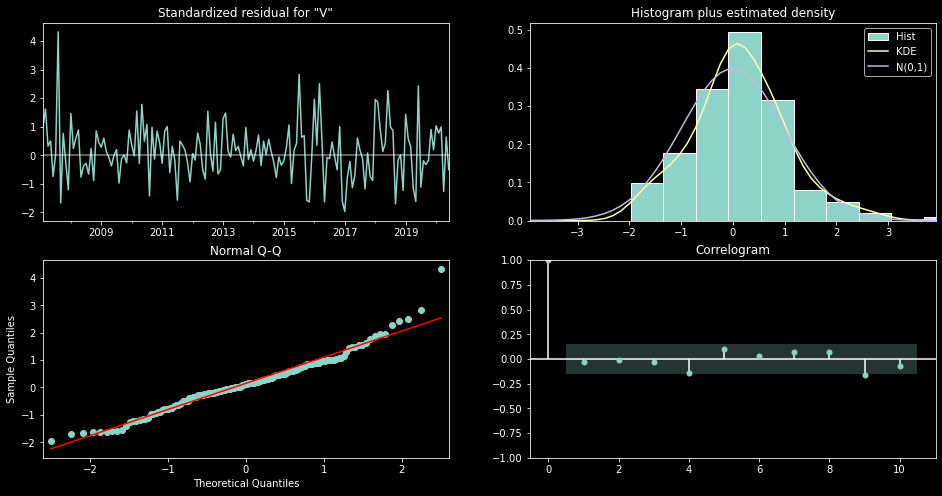



----------------------------------------------- 
 ----------------------------------------------- 

Ljung-Box Test - Checks for Serial Correlation 

null-hypothesis:         The residuals are independently distributed.
alternative-hypothesis:  The residuals are not independently distributed 
 -----------------------------------------------
      lb_stat  lb_pvalue
1    0.016127   0.898947
2    0.086815   0.957521
3    0.198749   0.977791
4    2.819700   0.588437
5    3.959217   0.555303
6    4.049535   0.669973
7    7.745403   0.355579
8    7.900848   0.443215
9   11.282924   0.256813
10  12.273580   0.267164


In [12]:
timeseries.results_diagnostics(10)

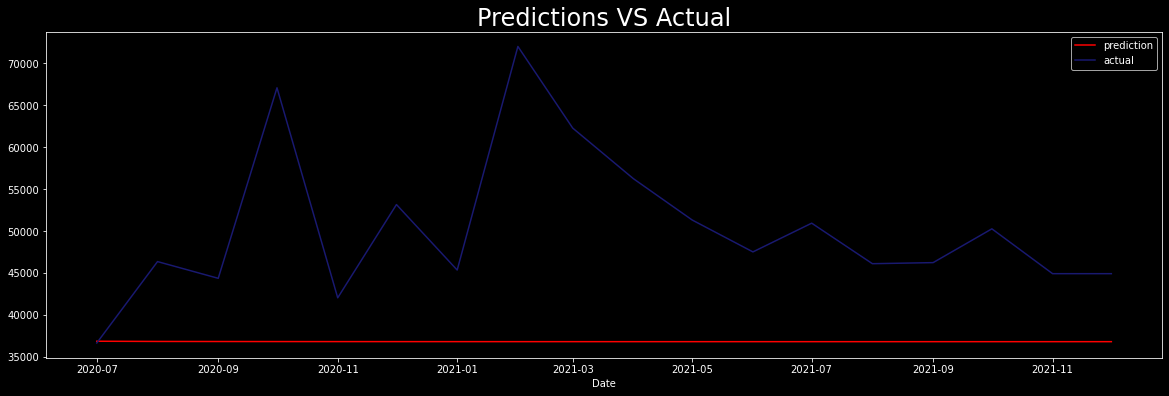

In [13]:
timeseries.prediction_check(test_data=test)

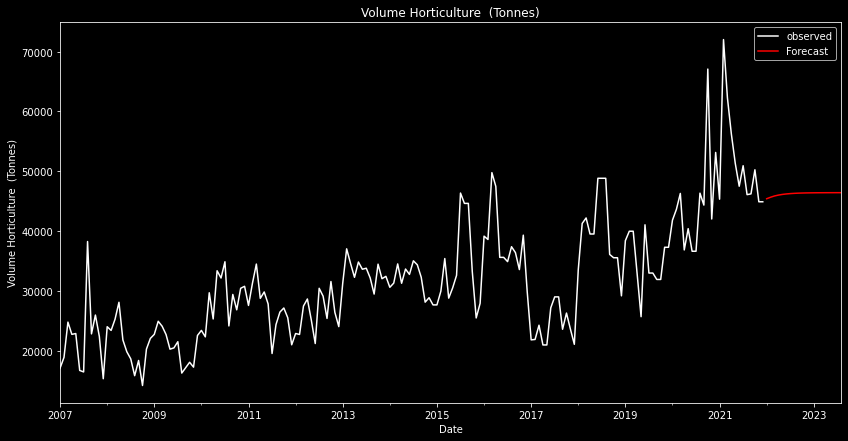

In [14]:
predictions = timeseries.forecasts(data["Volume Horticulture  (Tonnes)"],steps=20)

In [15]:
from basicTimeSeries import SARIMAModels 

In [16]:
sarima_models = SARIMAModels()
sarima_models.model_evaluation(train_data=train, order_limit=2)

Choosing the best model from the range provided 
 -----------------------------------------------
ARIMA(0, 0, 0)x(0, 0, 0, 12)season:12 - AIC:3787.6179432123718 - LLF:-1892.8089716061859
ARIMA(0, 0, 0)x(0, 0, 1, 12)season:12 - AIC:3432.619805853821 - LLF:-1714.3099029269106
ARIMA(0, 0, 0)x(0, 1, 0, 12)season:12 - AIC:3146.2565356085706 - LLF:-1572.1282678042853
ARIMA(0, 0, 0)x(0, 1, 1, 12)season:12 - AIC:2858.2929342646967 - LLF:-1427.1464671323483
ARIMA(0, 0, 0)x(1, 0, 0, 12)season:12 - AIC:3168.351812197443 - LLF:-1582.1759060987215
ARIMA(0, 0, 0)x(1, 0, 1, 12)season:12 - AIC:3101.420859838294 - LLF:-1547.710429919147
ARIMA(0, 0, 0)x(1, 1, 0, 12)season:12 - AIC:2858.6450321413577 - LLF:-1427.3225160706788
ARIMA(0, 0, 0)x(1, 1, 1, 12)season:12 - AIC:2834.1301686581273 - LLF:-1414.0650843290637
ARIMA(0, 0, 1)x(0, 0, 0, 12)season:12 - AIC:3656.8440155127537 - LLF:-1826.4220077563768
ARIMA(0, 0, 1)x(0, 0, 1, 12)season:12 - AIC:3362.0142776562743 - LLF:-1678.0071388281372
ARIMA(0, 0, 1)x(

In [17]:
residuals = sarima_models.best_model(train, order=(0, 1, 1),
                         seasonal_order=(1, 1, 1, 12))

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2836      0.091     -3.104      0.002      -0.463      -0.105
ar.S.L12      -0.0363      0.088     -0.412      0.681      -0.209       0.137
ma.S.L12      -0.8613      0.050    -17.206      0.000      -0.959      -0.763
sigma2      2.374e+07   3.35e-10   7.09e+16      0.000    2.37e+07    2.37e+07


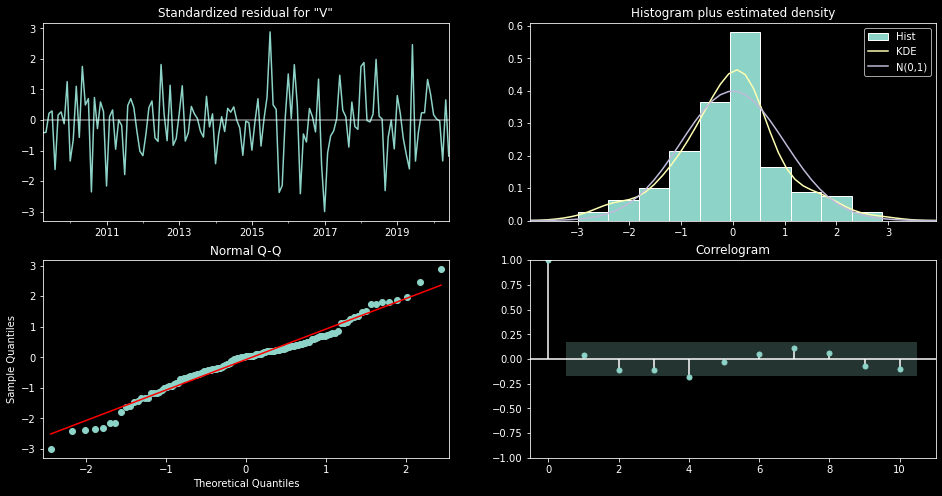



----------------------------------------------- 
 ----------------------------------------------- 

Ljung-Box Test - Checks for Serial Correlation 

null-hypothesis:         The residuals are independently distributed.
alternative-hypothesis:  The residuals are not independently distributed 
 -----------------------------------------------
      lb_stat  lb_pvalue
1    0.027218   0.868960
2    0.674712   0.713655
3    1.433283   0.697752
4    7.427587   0.114945
5    7.427591   0.190732
6    7.580719   0.270457
7   13.760081   0.055617
8   14.145434   0.078053
9   15.777652   0.071673
10  17.480551   0.064384


In [18]:
sarima_models.results_diagnostics(10)

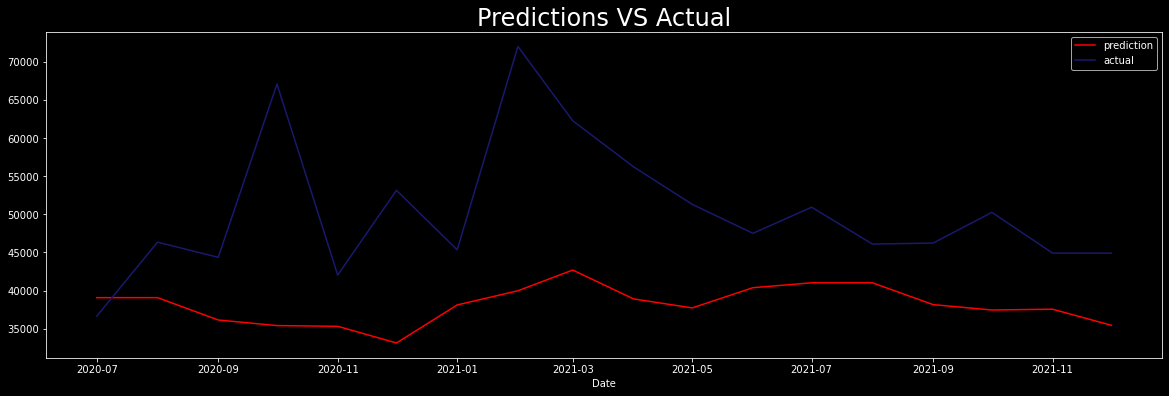

In [19]:
sarima_models.prediction_check(test_data=test)

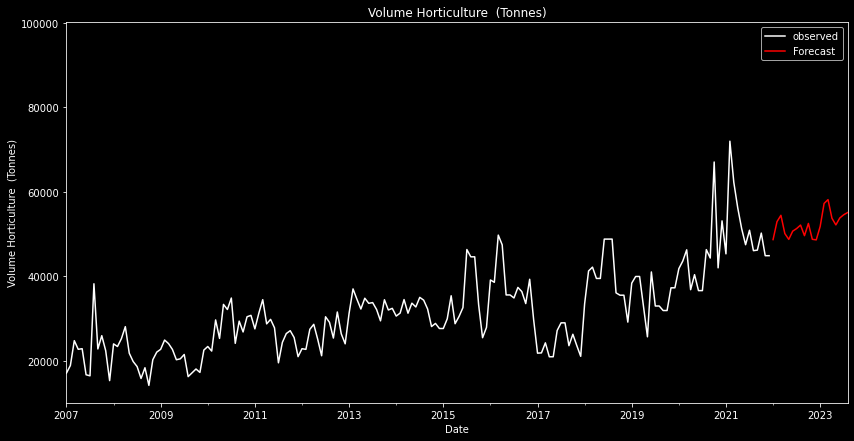

In [20]:
predictions = sarima_models.forecasts(data["Volume Horticulture  (Tonnes)"],steps=20)